In [1]:
 import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()  # Select the downloaded `kaggle.json` file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanth03alamanda","key":"1d64db2a2b4973cd08523cdb9e95a4f2"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 86% 128M/149M [00:00<00:00, 1.34GB/s]
100% 149M/149M [00:00<00:00, 1.26GB/s]


In [5]:
def get_class_paths(path):
  classes=[]
  class_paths = []
  #Iterate through directions in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path,label)

    #check if its a directory
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path=os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df=pd.DataFrame({
        'Class Path':class_paths,
        'Class':classes
})

  return df

In [6]:
tr_df = get_class_paths("/content/Training")

In [7]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0944.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0898.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0265.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0115.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_1403.jpg,pituitary
...,...,...
5707,/content/Training/notumor/Tr-no_1320.jpg,notumor
5708,/content/Training/notumor/Tr-no_0812.jpg,notumor
5709,/content/Training/notumor/Tr-no_0325.jpg,notumor
5710,/content/Training/notumor/Tr-no_0144.jpg,notumor


In [8]:
ts_df =get_class_paths("/content/Testing")

In [9]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0203.jpg,pituitary
1,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0282.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0153.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0179.jpg,pituitary
...,...,...
1306,/content/Testing/notumor/Te-no_0060.jpg,notumor
1307,/content/Testing/notumor/Te-no_0336.jpg,notumor
1308,/content/Testing/notumor/Te-no_0238.jpg,notumor
1309,/content/Testing/notumor/Te-no_0014.jpg,notumor


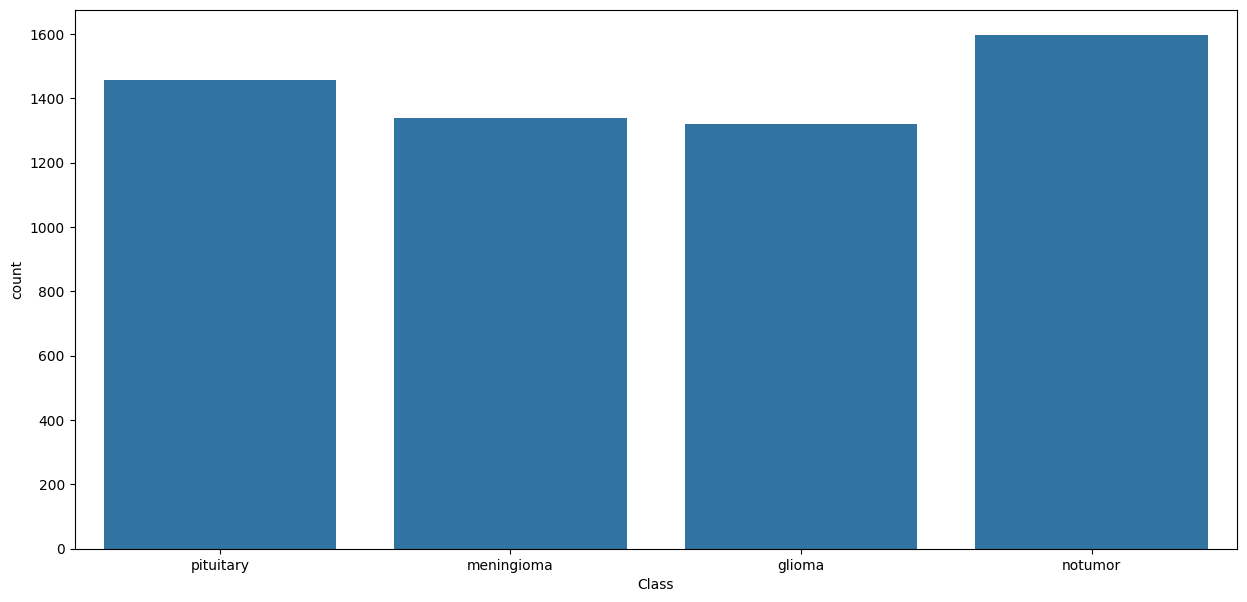

In [10]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=tr_df, x=tr_df['Class'])

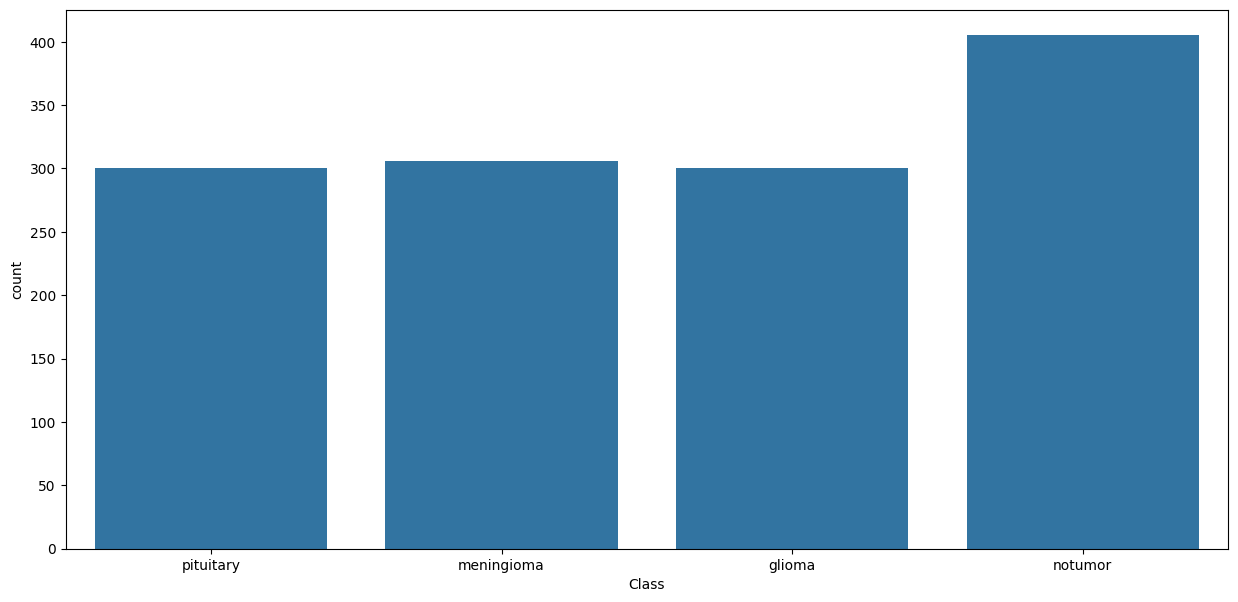

In [11]:
plt.figure(figsize=(15,7))
ax=sns.countplot(data=ts_df, x=ts_df['Class'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
valid_df, ts_df=train_test_split(ts_df,train_size=0.5, stratify=ts_df['Class'])



In [14]:
valid_df

,Class Path,Class
1022,/content/Testing/notumor/Te-no_0312.jpg,notumor
510,/content/Testing/meningioma/Te-me_0038.jpg,meningioma
506,/content/Testing/meningioma/Te-me_0084.jpg,meningioma
1161,/content/Testing/notumor/Te-no_0317.jpg,notumor
296,/content/Testing/pituitary/Te-pi_0012.jpg,pituitary
...,...,...
986,/content/Testing/notumor/Te-no_0185.jpg,notumor
157,/content/Testing/pituitary/Te-pi_0287.jpg,pituitary
311,/content/Testing/meningioma/Te-me_0081.jpg,meningioma
336,/content/Testing/meningioma/Te-me_0031.jpg,meningioma


In [15]:
ts_df

,Class Path,Class
1030,/content/Testing/notumor/Te-no_0206.jpg,notumor
3,/content/Testing/pituitary/Te-pi_0153.jpg,pituitary
464,/content/Testing/meningioma/Te-me_0040.jpg,meningioma
1003,/content/Testing/notumor/Te-no_0404.jpg,notumor
786,/content/Testing/glioma/Te-gl_0057.jpg,glioma
...,...,...
747,/content/Testing/glioma/Te-gl_0277.jpg,glioma
349,/content/Testing/meningioma/Te-me_0253.jpg,meningioma
838,/content/Testing/glioma/Te-gl_0180.jpg,glioma
792,/content/Testing/glioma/Te-gl_0147.jpg,glioma


In [16]:
batch_size=32

img_size=(299,299)

image_generator=ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


In [17]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                           y_col='Class',
                                           batch_size= batch_size,
                                           target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                           y_col='Class',
                                           batch_size= batch_size,
                                           target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                           y_col='Class',
                                           batch_size= 16,
                                           target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


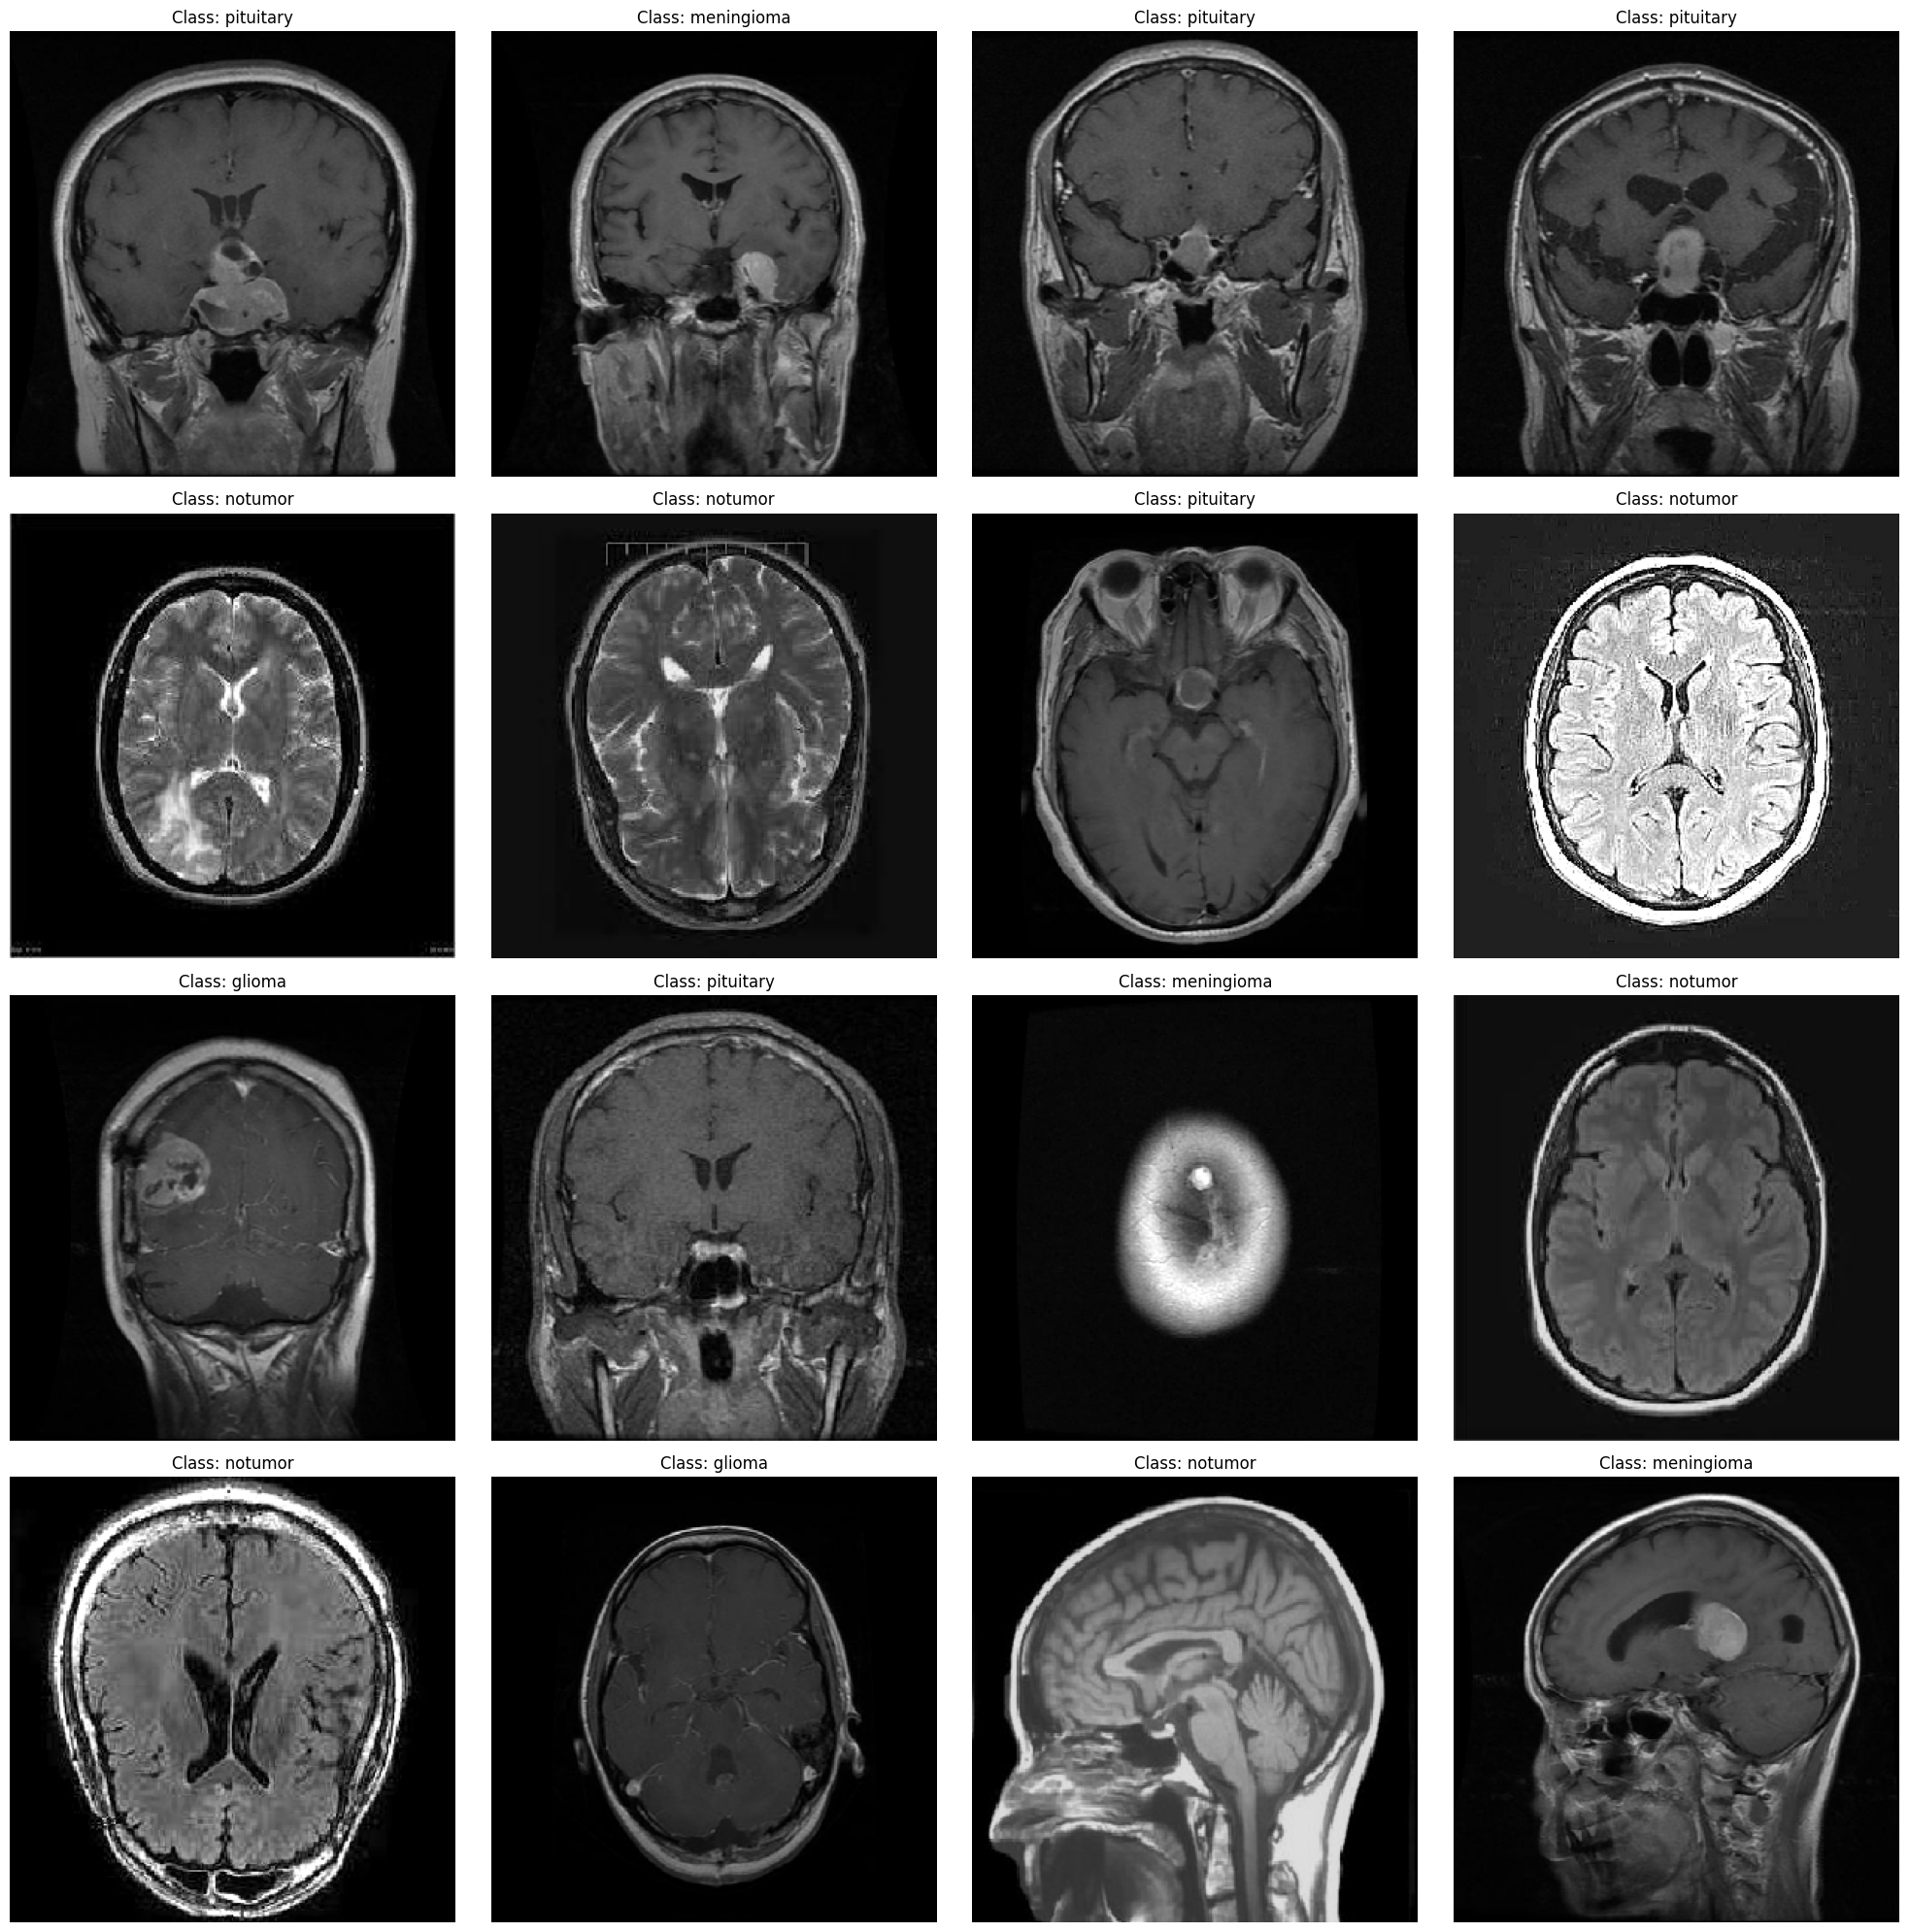

In [18]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch =next(tr_gen)
  image =batch[0][0]
  label =batch[1][0]
  plt.imshow(image)

#Get the class index
  class_index= np.argmax(label)

#Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

#Find the index of the class_index in the list of indices
  index_position= class_indices.index(class_index)

#Get the class name using the index position
  class_name = class_names [index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
img_shape=(299,299,3)

base_model = tf.keras.applications.Xception(include_top= False,
                                            weights= "imagenet",
                                            input_shape= img_shape,
                                            pooling= 'max')

model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate= 0.3),
        Dense (128, activation= 'relu'),
        Dropout(rate= 0.25),
        Dense(4, activation= 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
              Precision(),
              Recall()])

In [21]:
hist =model.fit(tr_gen, epochs=5, validation_data=valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.5163 - loss: 1.1549 - precision: 0.6654 - recall: 0.3005 - val_accuracy: 0.9282 - val_loss: 0.2057 - val_precision: 0.9292 - val_recall: 0.9221
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 179s 808ms/step - accuracy: 0.9649 - loss: 0.0986 - precision: 0.9660 - recall: 0.9616 - val_accuracy: 0.9603 - val_loss: 0.1109 - val_precision: 0.9646 - val_recall: 0.9557
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 209s 848ms/step - accuracy: 0.9915 - loss: 0.0296 - precision: 0.9915 - recall: 0.9911 - val_accuracy: 0.9679 - val_loss: 0.0908 - val_precision: 0.9694 - val_recall: 0.9679
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 150s 840ms/step - accuracy: 0.9919 - loss: 0.0261 - precision: 0.9923 - recall: 0.9919 - val_accuracy: 0.9756 - val_loss: 0.0941 - val_precision: 0.9756 - val_recall: 0.9756
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 833ms/step - accuracy: 0.9964 - loss: 0.0134 - precision: 0.9967 - recall: 0.9960 - val_accuracy: 0.9847 - 

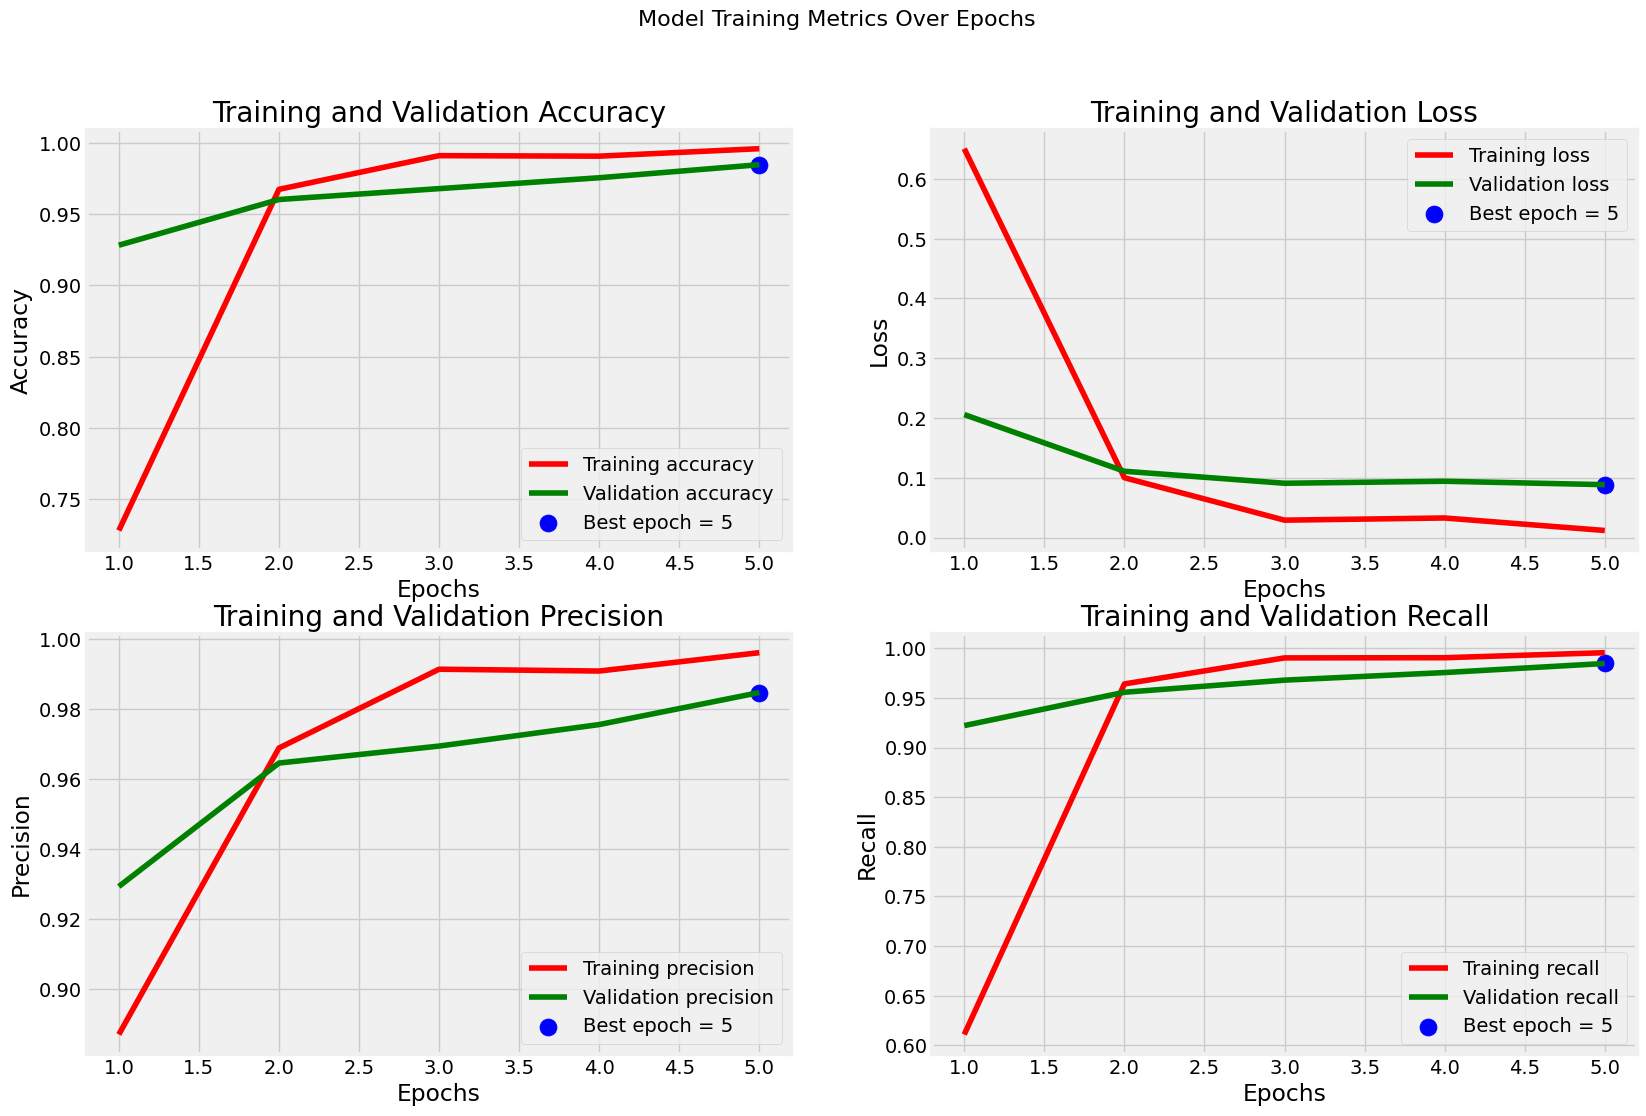

In [22]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m=='loss':
      idx = np.argmin(val_metrics[m])
    else:
      idx = np.argmax(val_metrics [m])
    best_epochs[m]= idx + 1
    best_values[m]= val_metrics[m][idx]

# Plot metrics

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs =range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label= f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [23]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.9976 - loss: 0.0130 - precision: 0.9976 - recall: 0.9976
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.9883 - loss: 0.0600 - precision: 0.9883 - recall: 0.9883


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9897 - loss: 0.0492 - precision: 0.9897 - recall: 0.9895
Train Accuracy: 99.84%
Train Loss: 0.0082


Validation Accuracy: 98.47%
Validation Loss: 0.0774


Test Accuracy: 98.63%
Test Loss: 0.1069


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step


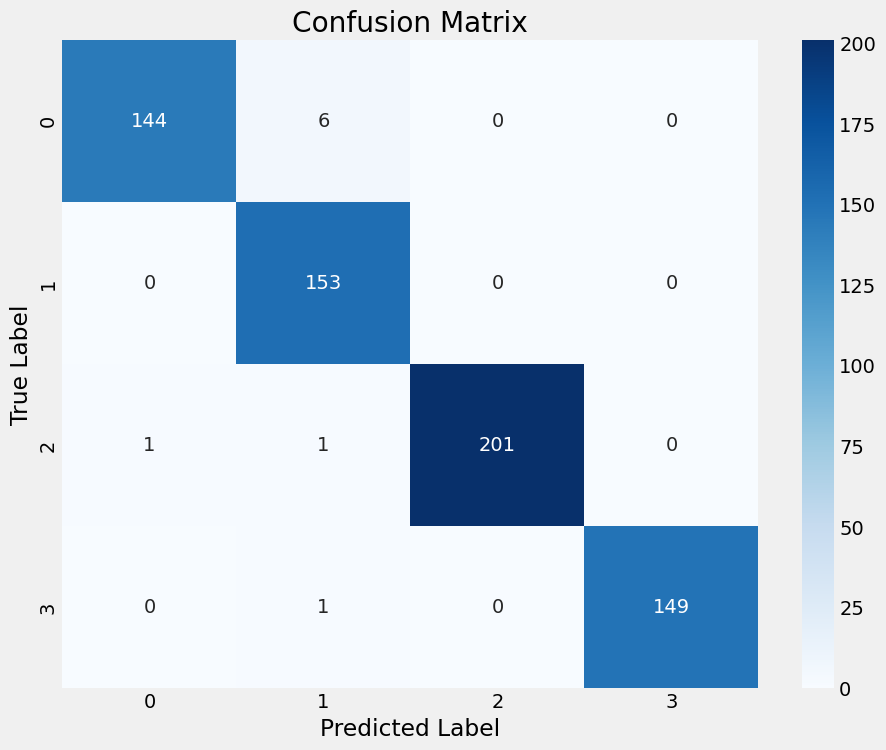

In [24]:
preds= model.predict(ts_gen)
y_pred= np.argmax(preds, axis=1)

class_dict={
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}
#Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels= list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from PIL import Image

def predict(img_path: str)-> None:
   # Get class labels
   labels= list(class_dict.keys())

   #Create figure
   plt.figure(figsize=(6, 8))

   #Load and preprocess image
   img=Image.open(img_path)
   resized_img =img.resize((299,299))
   img_array =np.asarray(resized_img)
   img_array =np.expand_dims(img_array, axis=0) / 255.0

#Get model predictions
   predictions= model.predict(img_array)
   probabilities = list(predictions[0])

#Get predicted class
   predicted_class_idx= np.argmax(probabilities)
   predicted_class = class_dict[predicted_class_idx]

#Plot original image
   plt.subplot(2, 1, 1)
   plt.imshow(resized_img)
   plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

#Plot prediction probabilities
   plt.subplot(2, 1, 2)
   bars= plt.barh(labels, probabilities)
   plt.xlabel("Probability", fontsize=15)
   plt.title("Class Probabilities")

#Add probability labels to bars
   ax = plt.gca()
   ax.bar_label(bars, fmt="%.2f")

   plt.tight_layout()
   plt.show()

   print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


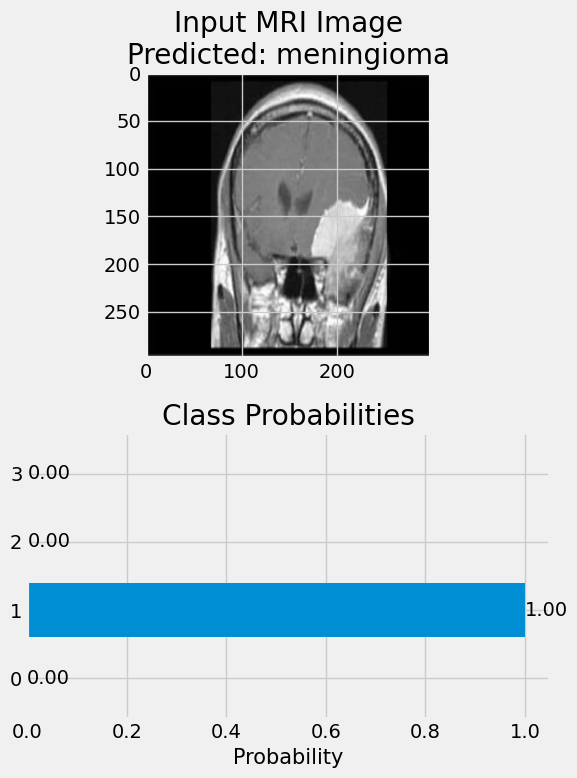


Predicted tumor type: meningioma


In [26]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


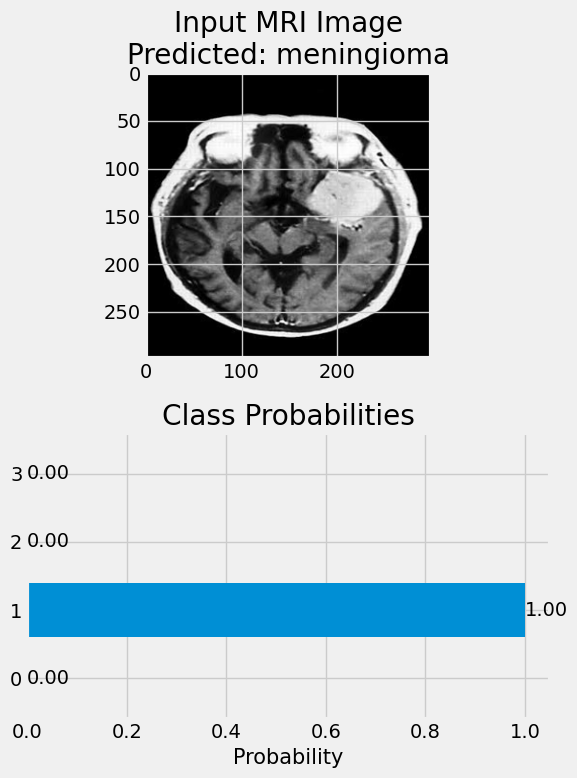


Predicted tumor type: meningioma


In [27]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


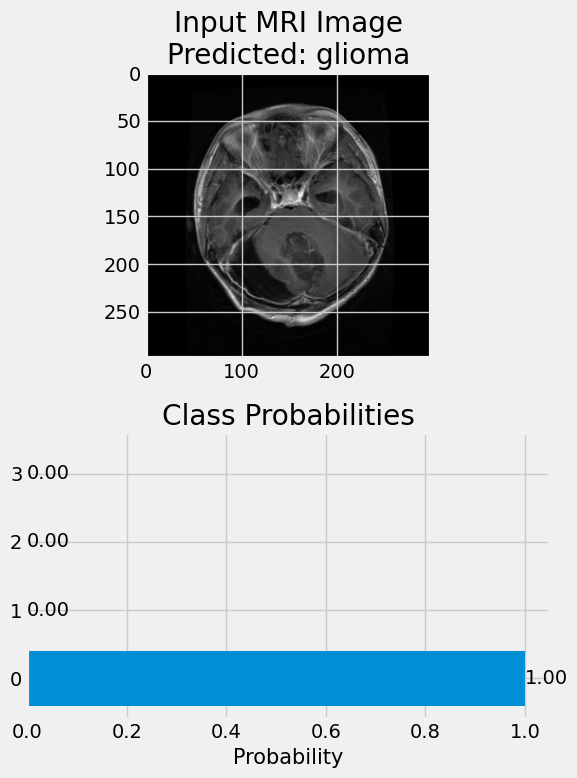


Predicted tumor type: glioma


In [28]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [29]:
model.save_weights("xception_model.weights.h5")

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [31]:
batch_size=16

img_size=(224,224)

image_generator=ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                           y_col='Class',
                                           batch_size= batch_size,
                                           target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                           y_col='Class',
                                           batch_size= batch_size,
                                           target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                           y_col='Class',
                                           batch_size= 16,
                                           target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [32]:
#Create a Sequential model

cnn_model= Sequential()

#Convolutional layers

cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation ='relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation ='relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation ='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))

#Flatten the output for fully connected layers

cnn_model.add(Flatten())

#Fully connected layers

cnn_model.add(Dense(256, activation= 'relu', kernel_regularizer= regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

#Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

#Display the model summary
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 153s 360ms/step - accuracy: 0.5835 - loss: 2.2076 - precision_1: 0.6856 - recall_1: 0.3874 - val_accuracy: 0.7847 - val_loss: 0.8148 - val_precision_1: 0.8124 - val_recall_1: 0.7206
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 116s 325ms/step - accuracy: 0.8235 - loss: 0.6896 - precision_1: 0.8406 - recall_1: 0.7956 - val_accuracy: 0.8214 - val_loss: 0.6144 - val_precision_1: 0.8433 - val_recall_1: 0.7969
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 117s 327ms/step - accuracy: 0.8641 - loss: 0.5285 - precision_1: 0.8782 - recall_1: 0.8496 - val_accuracy: 0.8168 - val_loss: 0.6138 - val_precision_1: 0.8293 - val_recall_1: 0.7939
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 117s 328ms/step - accuracy: 0.8936 - loss: 0.4251 - precision_1: 0.9019 - recall_1: 0.8827 - val_accuracy: 0.8931 - val_loss: 0.4088 - val_precision_1: 0.9011 - val_recall_1: 0.8763
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 118s 330ms/step - accuracy: 0.9139 - loss: 0.3638 - precision_1: 0.9197 - recall_1: 0.9

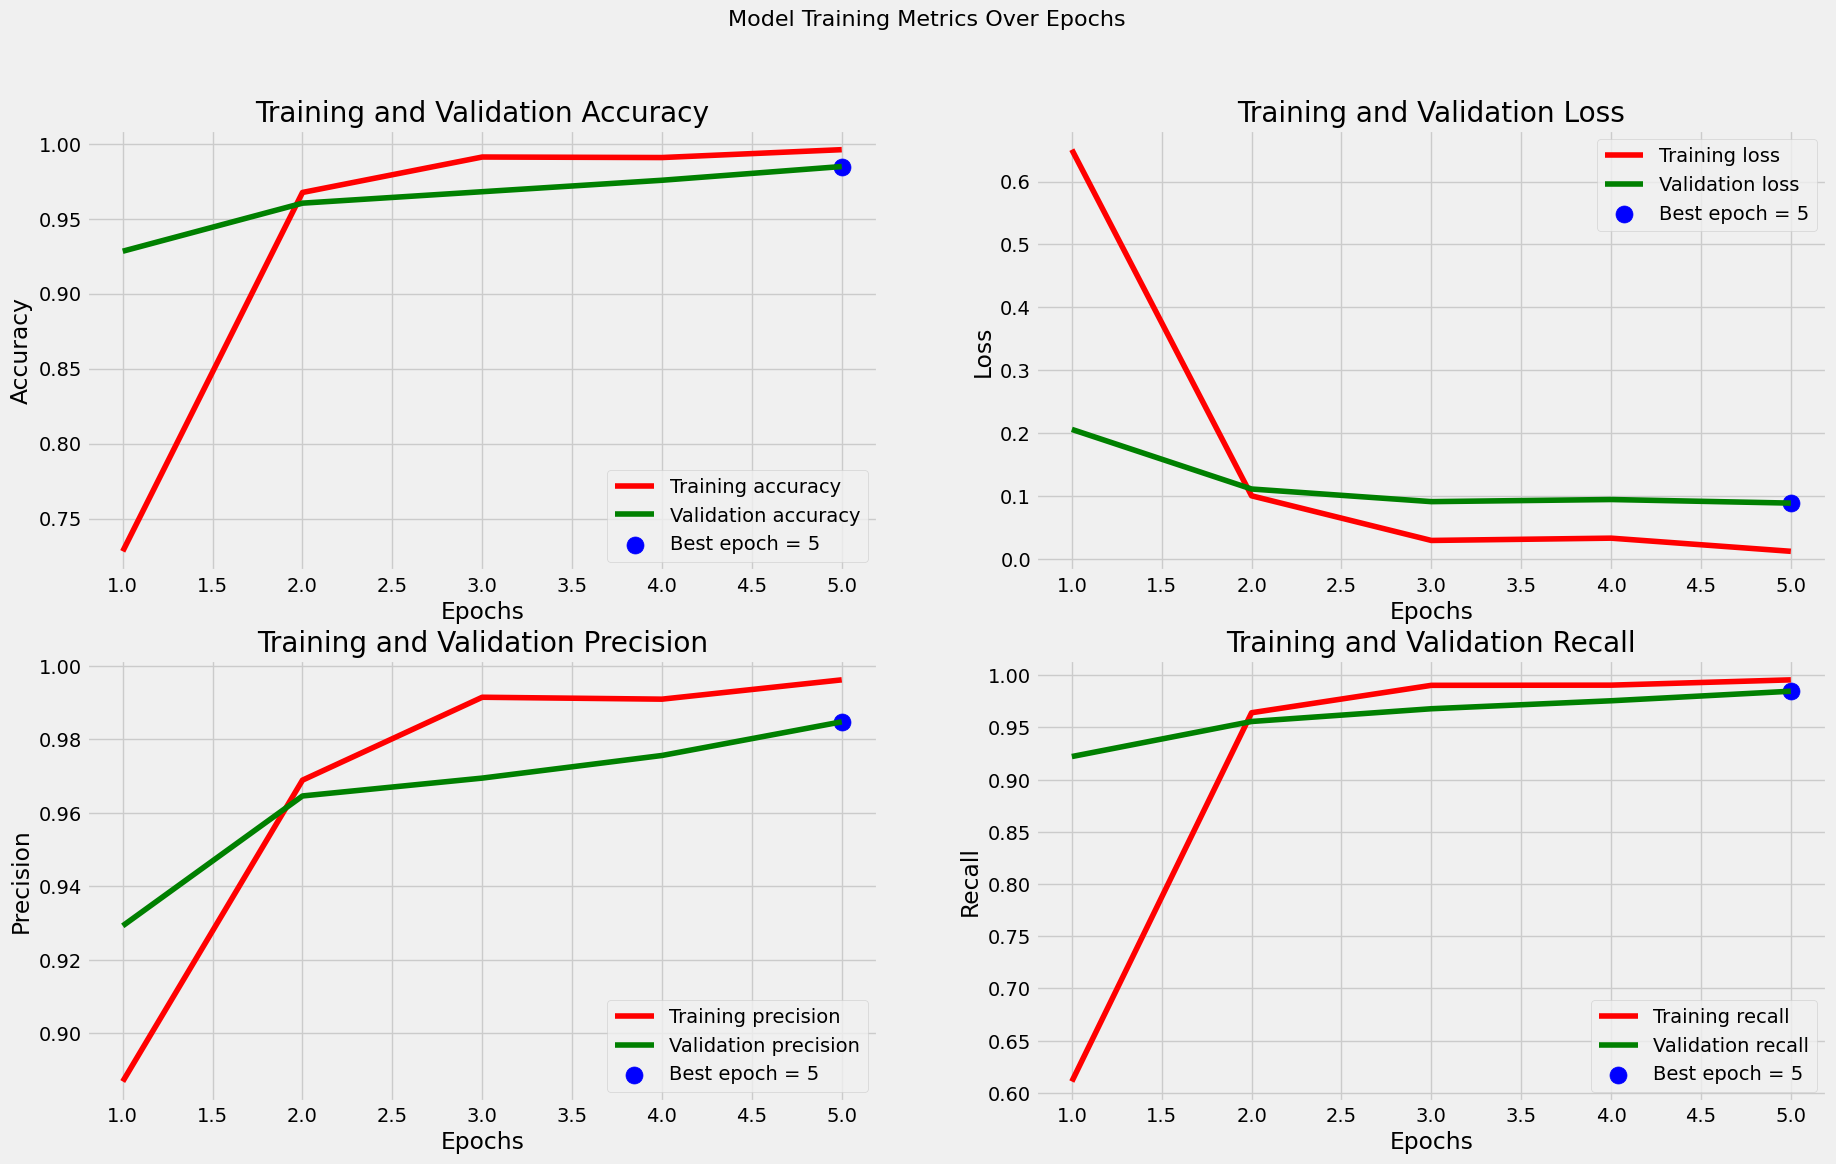

In [34]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m=='loss':
      idx = np.argmin(val_metrics[m])
    else:
      idx = np.argmax(val_metrics [m])
    best_epochs[m]= idx + 1
    best_values[m]= val_metrics[m][idx]

# Plot metrics

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs =range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label= f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [35]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.9525 - loss: 0.2893 - precision_1: 0.9556 - recall_1: 0.9462
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9024 - loss: 0.3857 - precision_1: 0.9072 - recall_1: 0.8934


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.8799 - loss: 0.4779 - precision_1: 0.8813 - recall_1: 0.8626
Train Accuracy: 94.94%
Train Loss: 0.2901


Validation Accuracy: 90.23%
Validation Loss: 0.3978


Test Accuracy: 88.26%
Test Loss: 0.4482


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step


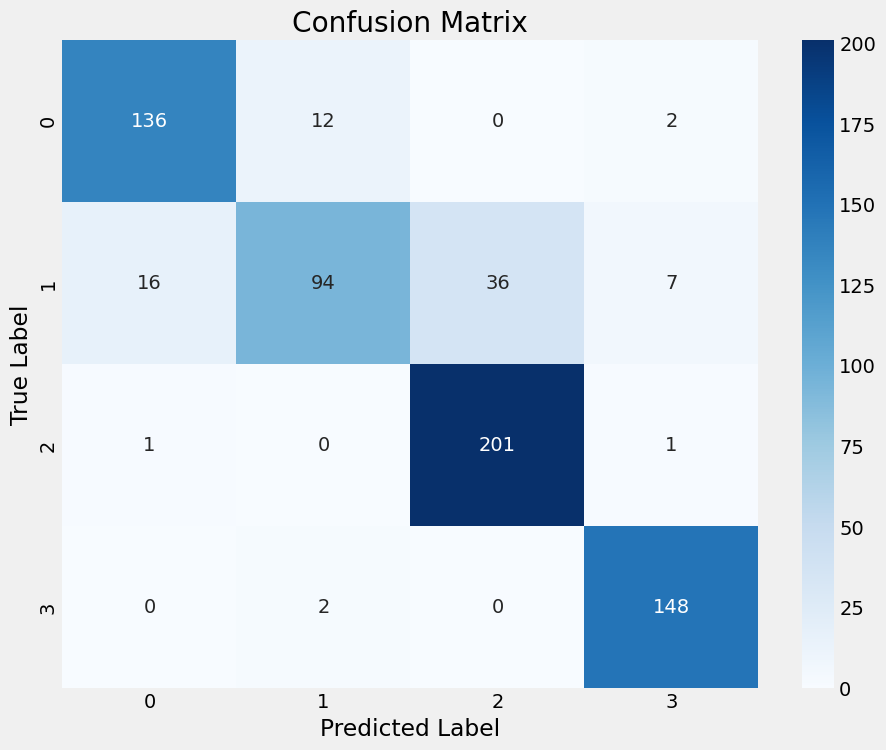

In [36]:
preds= cnn_model.predict(ts_gen)
y_pred= np.argmax(preds, axis=1)

class_dict={
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}
#Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels= list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       150
           1       0.87      0.61      0.72       153
           2       0.85      0.99      0.91       203
           3       0.94      0.99      0.96       150

    accuracy                           0.88       656
   macro avg       0.89      0.87      0.87       656
weighted avg       0.88      0.88      0.88       656



In [38]:
cnn_model.save("cnn_model.h5")

## Part 2: Streamlit Web App

In [39]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.7 MB/s eta 0:00:00


In [40]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [41]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [42]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [43]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir='saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):

    prompt= f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or ne tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence*100}%.

    In your response:
     -Explain what regions of the brain the model is focusing on, based on the saliency nap. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
     - Explain possible reasons why the model made the prediction it did.
     -Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in Light cyan'
      in your explanation.
      -Keep your explanation to 4 sentences max.

      Let's think step by step about this. Verify step by step
    """

    img =PIL.Image.open(img_path)
    model= genai.GenerativeModel(model_name="gemini-1.5-flash")
    response= model.generate_content((prompt, img))

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
      img_tensor = tf.convert_to_tensor(img_array)
      tape.watch(img_tensor)
      predictions = model(img_tensor)
      target_class= predictions[:, class_index]


  gradients= tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients= gradients.numpy().squeeze()

#Resize gradients to match original image size
  gradients =cv2.resize(gradients, img_size)



#Create a circular mask for the brain area
  center= (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius= min(center[0], center[1]) - 10
  y, x= np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask= (x-center[0])**2+ (y -center[1])**2 <= radius**2

#Apply mask to gradients
  gradients =gradients* mask

#Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients [mask] = brain_gradients

#Apply a higher threshold
  threshold= np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] =0

#Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

#Create a heatmap overlay with enhanced contrast
  heatmap= cv2.applyColorMap(np.uint8(255* gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

#Resize heatmap to match original image size
  heatmap=cv2.resize(heatmap,img_size)

  #Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img= heatmap * 0.7+ original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
     f.write(uploaded_file.getbuffer())
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

#Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img





def load_xception_model(model_path):
    img_shape=(299,299,3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                  input_shape=img_shape, pooling='max')


    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense (128, activation= 'relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    #Compile the model
    model.compile(Adamax(learning_rate=0.001),
                 loss='categorical_crossentropy',
                  metrics=['accuracy',
                             Precision(),
                              Recall()])

    model.load_weights(model_path)

    return model



st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model=="Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size=(299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'tuitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array= image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /=255.0

  prediction =model.predict(img_array)

#Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
      st.write(f"{label}: {prob:.4f}")

  saliency_map= generate_saliency_map(model, img_array, class_index, img_size)

  coll, col2= st.columns(2)
  with coll:
      st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
  with col2:
      st.image(saliency_map, caption='Saliency Map', use_container_width=True)


  st.write("Classification Results")
  result_container= st.container()
  result_container = st.container()
  result_container.markdown(
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size:36px; font-weight:800; color: #FF0000; margin:0;">
                        {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                      <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                      <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                             {prediction[0][class_index]:.4%}
                      </p>
                 </div>
             </div>
         </div>
         """,

         unsafe_allow_html= True
  )
#Prepare data for Plotly chart
  probabilities= prediction[0]
  sorted_indices= np.argsort(probabilities)[::-1]
  sorted_labels= [labels[i] for i in sorted_indices]
  sorted_probabilities= probabilities[sorted_indices]

#Create a Plotly bar chart
  fig =go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label ==result else 'blue' for label in sorted_labels]
  ))

#Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

#Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
      fig.add_annotation(
          x=prob,
          y=i,
          text=f'{prob:.4f}',
          showarrow =False,
          xanchor='left',
          xshift= 5
      )

#Display the Plotly chart

  st.plotly_chart(fig)

  saliency_map_path= f'saliency_maps/{uploaded_file.name}'
  explanation= generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)




Writing app.py


In [44]:
thread = Thread(target=run_streamlit)
thread.start()

In [47]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:" , public_url)

Public URL: NgrokTunnel: "https://1707bd2c414e.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# Disconnect all active tunnels
ngrok.kill()

In [46]:
tunnels= ngrok.get_tunnels()

for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://7dfa19c1a9da.ngrok-free.app -> http://localhost:8501
